In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data
data = pd.read_csv('No-show-Issue-Comma-300k.csv/No-show-Issue-Comma-300k.csv')
data

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,Wednesday,Show-Up,0,0,1,0,0,0,0,1,-23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,Friday,No-Show,0,0,0,0,0,1,0,0,-1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,0,-6


In [3]:
#Data cleaning
#rename
data = data.rename(columns={'ApointmentData':'AppointmentData','Alcoolism':'Alcolism','HiperTension':'Hipertension','Handcap':'Handicap'})

In [4]:
#remove not reasonable data. (eg. Age > 100, Age<0)
data = data.drop((data[data['Age'] < 0]).index)
data = data.drop((data[data['Age'] > 100]).index)

In [5]:
#change the data format
y_index = data.index
y = [x[:-10] for x in data['AppointmentData'][:]]
y = pd.Series(y, index= y_index)
data['AppointmentData'] = y

In [6]:
#Absoulate value of Waiting time
data['AwaitingTime'] = data['AwaitingTime'].loc[:].abs()

In [7]:
# After data cleaning
data

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Status,Diabetes,Alcolism,Hipertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14,Wednesday,Show-Up,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19,Wednesday,Show-Up,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18,Tuesday,Show-Up,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07,Thursday,Show-Up,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27,Tuesday,Show-Up,0,0,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,2014-03-24T09:28:22Z,2014-04-16,Wednesday,Show-Up,0,0,1,0,0,0,0,1,23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25,Tuesday,Show-Up,1,0,1,0,0,0,0,1,4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25,Friday,No-Show,0,0,0,0,0,1,0,0,1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21,Thursday,Show-Up,0,0,0,0,0,0,0,0,6


In [8]:
# Before ploting graph
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
#Group by Status
data.groupby('Status').count()

,Age,Gender,AppointmentRegistration,AppointmentData,DayOfTheWeek,Diabetes,Alcolism,Hipertension,Handicap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
Status,,,,,,,,,,,,,,
No-Show,90719,90719,90719,90719,90719,90719,90719,90719,90719,90719,90719,90719,90719,90719
Show-Up,209248,209248,209248,209248,209248,209248,209248,209248,209248,209248,209248,209248,209248,209248


In [10]:
# Prepare data
ShowUp_NoShow = data.groupby('Status').count()['Gender']
NoShow_num = ShowUp_NoShow['No-Show']
ShowUp_num = ShowUp_NoShow['Show-Up']
TotalVali_num = NoShow_num + ShowUp_num
sizes = [(ShowUp_num / TotalVali_num) * 100, (NoShow_num / TotalVali_num) * 100]
labels = 'Show-Up', 'No-Show'

<IPython.core.display.Javascript object>


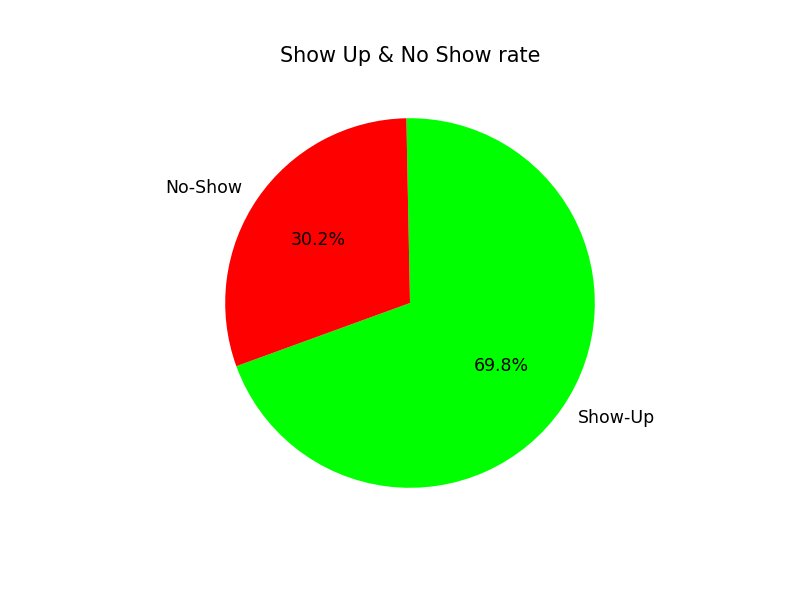

Text(0.5, 1.0, 'Show Up & No Show rate')

In [11]:
#Plot pie chart, about show up and no show rate
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=200, autopct='%1.1f%%', colors = ['lime','red'])
ax1.set_title('Show Up & No Show rate')

<IPython.core.display.Javascript object>


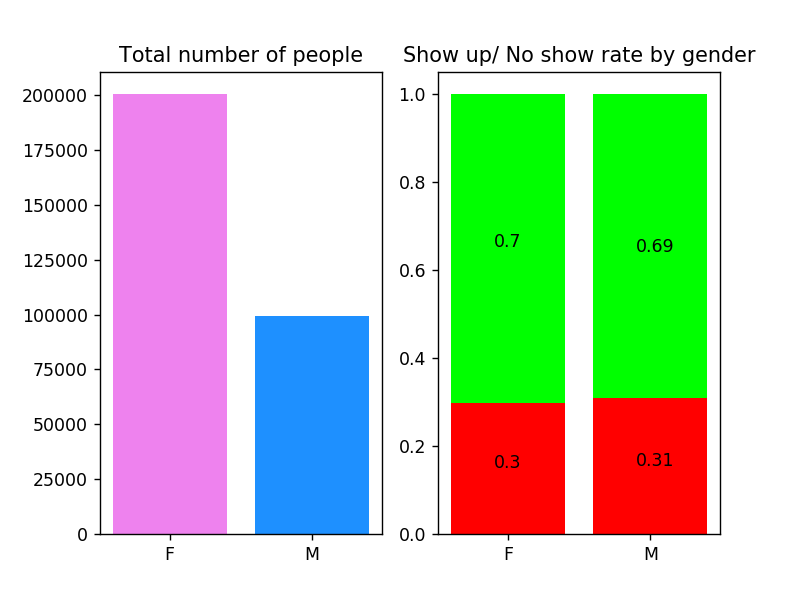

Text(0.5, 1.0, 'Show up/ No show rate by gender')

In [12]:
#Plot chart, related to Gender
#prepare data first
Gender_Status = data.groupby(['Gender','Status']).count()['Age'] 
TotalFemale = Gender_Status['F']['Show-Up'] + Gender_Status['F']['No-Show']
TotalMale = Gender_Status['M']['Show-Up'] + Gender_Status['M']['No-Show']
Gender_ShowUp = [Gender_Status['F']['Show-Up']/TotalFemale,Gender_Status['M']['Show-Up']/TotalMale]
Gender_NoShow = [Gender_Status['F']['No-Show']/TotalFemale,Gender_Status['M']['No-Show']/TotalMale]

#Plot graph
fig2 = plt.figure()
ax21 = fig2.add_subplot(1,2,1)
ax22 = fig2.add_subplot(1,2,2)
ax21.bar(['F','M'],data.groupby('Gender').count()['Age'], color = ['violet','dodgerblue'])
ax22.bar(['F','M'],Gender_NoShow, color = 'red')
ax22.bar(['F','M'],Gender_ShowUp, bottom=Gender_NoShow, color = 'lime')

for i, v in enumerate(Gender_NoShow):
    ax22.text(i -.1, v/2 , str(round(v,2)), color='black' )
for i, v in enumerate(Gender_ShowUp):
    ax22.text(i -.1, v-.05 , str(round(v,2)), color='black' )

ax21.set_title('Total number of people')
ax22.set_title('Show up/ No show rate by gender')

<IPython.core.display.Javascript object>


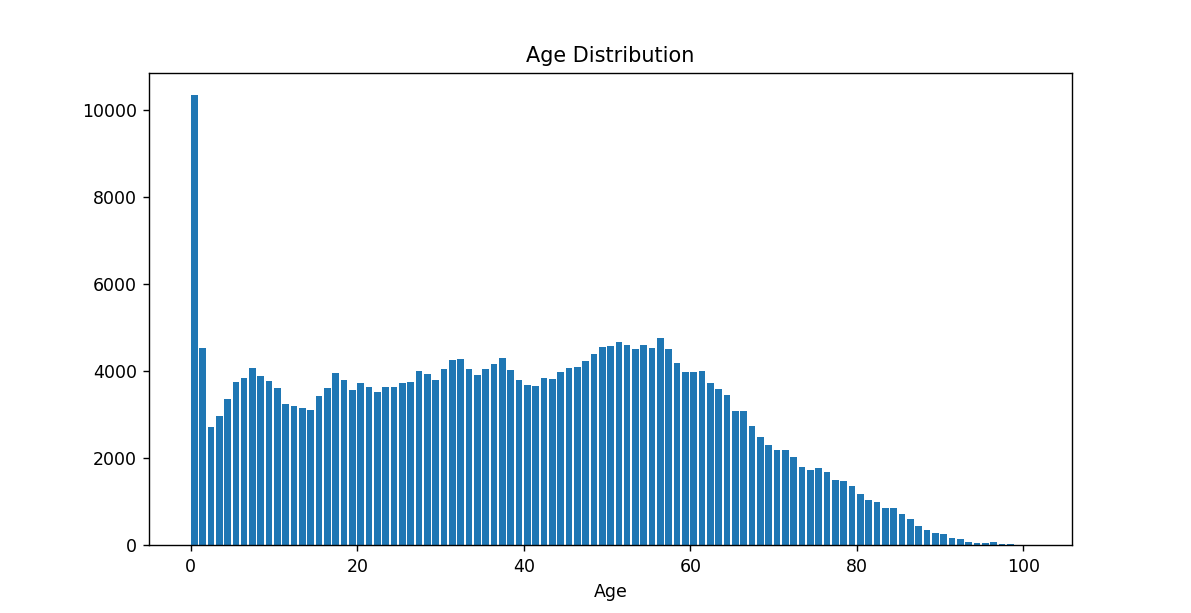

Text(0.5, 1.0, 'Age Distribution')

In [13]:
#Plot chart, related to Age
#Age_distribution
Age_distribution = data.groupby(['Age']).count()['Gender']
fig3, ax31 = plt.subplots()
plt.bar(np.arange(0,101),Age_distribution, align='edge')
plt.xlabel('Age')
plt.title('Age Distribution')

In [14]:
#prepare data first
Status_Age = data.groupby(['Status','Age']).count()['Gender']
# return a dataframe with multi-index
NoShow_AgeDistribution = Status_Age[:100]
# return a dataframe with multi-index
ShowUp_AgeDistribution = Status_Age[100:]
# return dataframe of Age distribution for those no show
NoShow_AgeDistribution2 = NoShow_AgeDistribution.reset_index()
del NoShow_AgeDistribution2['Status']
NoShow_AgeDistribution2.set_index('Age', inplace=True)
NoShow_AgeDistribution2.rename(columns={'Gender': 'Value'}, inplace=True)
# return dataframe of Age distribution for those show up
ShowUp_AgeDistribution2 = ShowUp_AgeDistribution.reset_index()
del ShowUp_AgeDistribution2['Status']
ShowUp_AgeDistribution2.set_index('Age', inplace=True)
ShowUp_AgeDistribution2.rename(columns={'Gender': 'Value'}, inplace=True)
# Age distribution
Total_by_Age = NoShow_AgeDistribution2.add(ShowUp_AgeDistribution2, fill_value = 0)
# show up rate in Age
ShowUpRate_ByAge = ShowUp_AgeDistribution2.div(Total_by_Age, fill_value = 0)
# no show rate in Age
NoShowRate_ByAge = NoShow_AgeDistribution2.div(Total_by_Age, fill_value = 0)

<IPython.core.display.Javascript object>


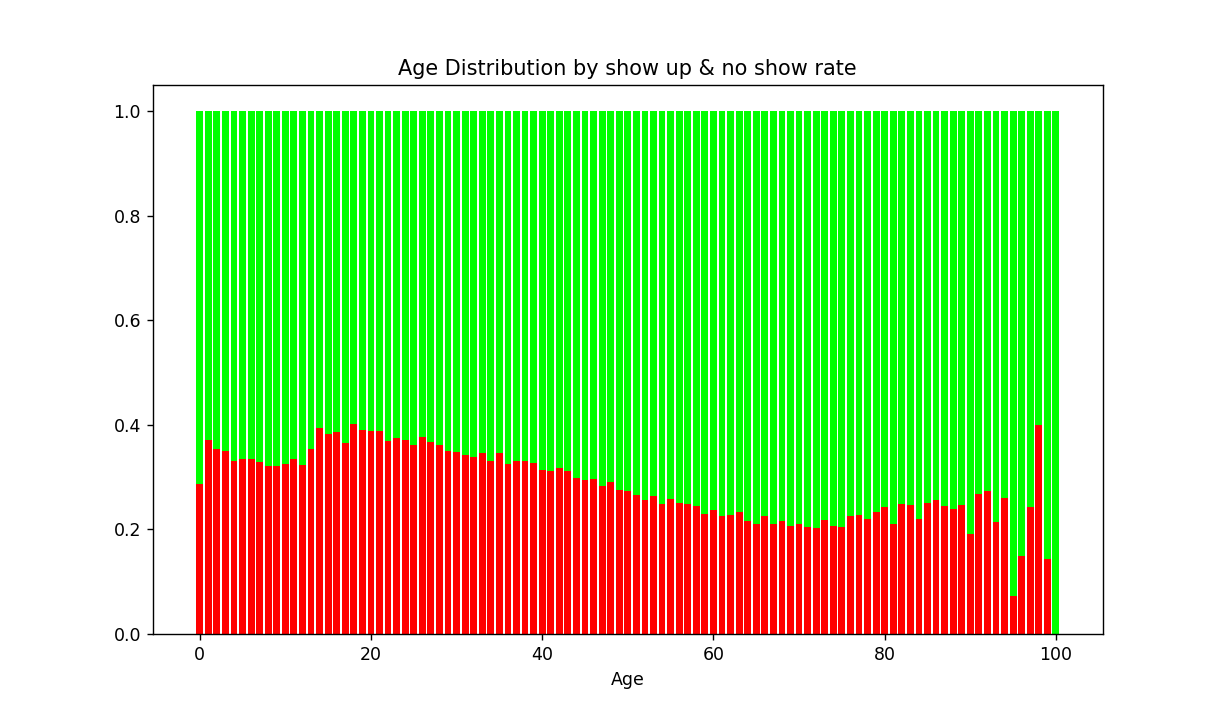

Text(0.5, 1.0, 'Age Distribution by show up & no show rate')

In [15]:
# plot figure
fig4, ax41 = plt.subplots()
ax41.bar(np.arange(101),NoShowRate_ByAge['Value'], color = 'red' )
ax41.bar(np.arange(101),ShowUpRate_ByAge['Value'],  bottom = NoShowRate_ByAge['Value'],  color = 'lime')
ax41.set_xlabel('Age')
ax41.set_title('Age Distribution by show up & no show rate')

<IPython.core.display.Javascript object>


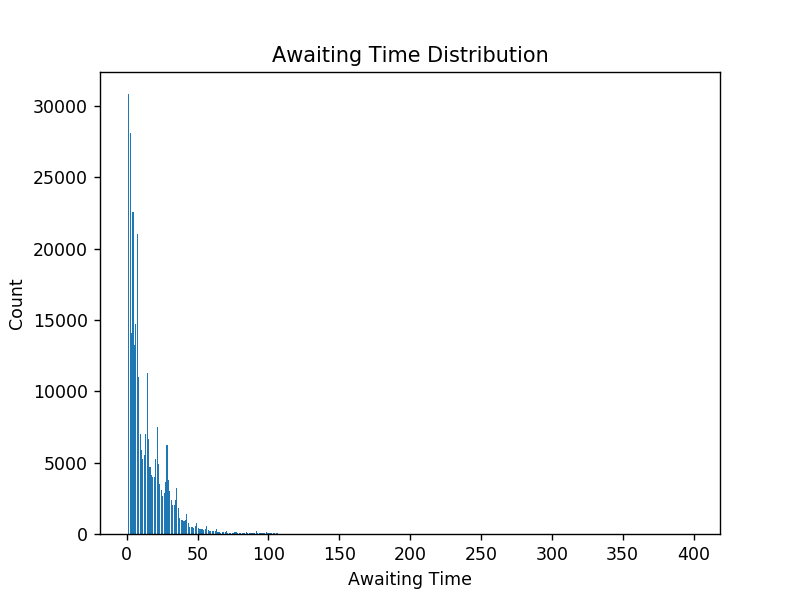

Text(0.5, 1.0, 'Awaiting Time Distribution')

In [16]:
# Waiting time distribution
time_distribution = data.groupby(['AwaitingTime']).count()['Gender']
fig5, ax51 = plt.subplots()
plt.bar(time_distribution.index,time_distribution, align='edge')
plt.xlabel('Awaiting Time')
plt.ylabel('Count')
plt.title('Awaiting Time Distribution')

In [17]:
# Awaiting time distribution, awaiting time less than 70 days is grouped for 7 days in one group. 
#For awaiting time geater than 70 days in another whole group.
a = pd.crosstab(data.AwaitingTime, data.Status)[:70]

emp = []
for i in range(1,11):
    for j in range(1,8):
        first = 1 + 7 * (i-1)
        last = 7 * i
        word = (str(first) + ' - '+ str(last))
        emp.append(word)
b = pd.DataFrame(emp, index = a.index, columns = ['Grouping_in_days'])

c = pd.merge(a,b, left_index = True, right_index = True)
d = c.set_index('Grouping_in_days')

total_in_awaitingtime_ByStatus = d.groupby(d.index).sum()
total_in_awaitingtime = total_in_awaitingtime_ByStatus['No-Show'] + total_in_awaitingtime_ByStatus['Show-Up']
total_in_awaitingtime.name = 'Total'

total_in_awaitingtime
AwaitingTimeDistribution = pd.merge(total_in_awaitingtime_ByStatus,total_in_awaitingtime , left_index = True, right_index = True)

sorting = [1,3,4,5,6,7,8,9,10,2]
Sorting_dataframe = pd.DataFrame(sorting, index = AwaitingTimeDistribution.index, columns = ['Sorting'])
AwaitingTimeDistribution = pd.merge(AwaitingTimeDistribution,Sorting_dataframe , left_index = True, right_index = True)
AwaitingTimeDistribution = AwaitingTimeDistribution.sort_values(by=['Sorting'])
QQ = pd.crosstab(data.AwaitingTime, data.Status)[71:].sum()
PP = pd.Series([QQ['No-Show'],QQ['Show-Up'], QQ['No-Show'] + QQ['Show-Up'],11], index = ['No-Show', 'Show-Up', 'Total', 'Sorting'], name = '>70')
AwaitingTimeDistribution = AwaitingTimeDistribution.append(PP)

AwaitingTimeDistribution['No-Show_rate'] = AwaitingTimeDistribution['No-Show'] / AwaitingTimeDistribution['Total']
AwaitingTimeDistribution['Show-Up_rate'] = AwaitingTimeDistribution['Show-Up'] / AwaitingTimeDistribution['Total']
AwaitingTimeDistribution

,No-Show,Show-Up,Total,Sorting,No-Show_rate,Show-Up_rate
Grouping_in_days,,,,,,
1 - 7,37648,106797,144445,1,0.260639,0.739361
8 - 14,17256,35692,52948,2,0.325905,0.674095
15 - 21,12446,23819,36265,3,0.343196,0.656804
22 - 28,9449,17414,26863,4,0.351748,0.648252
29 - 35,6481,12356,18837,5,0.344057,0.655943
36 - 42,2993,5194,8187,6,0.365580,0.634420
43 - 49,1469,2487,3956,7,0.371335,0.628665
50 - 56,978,1639,2617,8,0.373710,0.626290
57 - 63,625,1139,1764,9,0.354308,0.645692


<IPython.core.display.Javascript object>


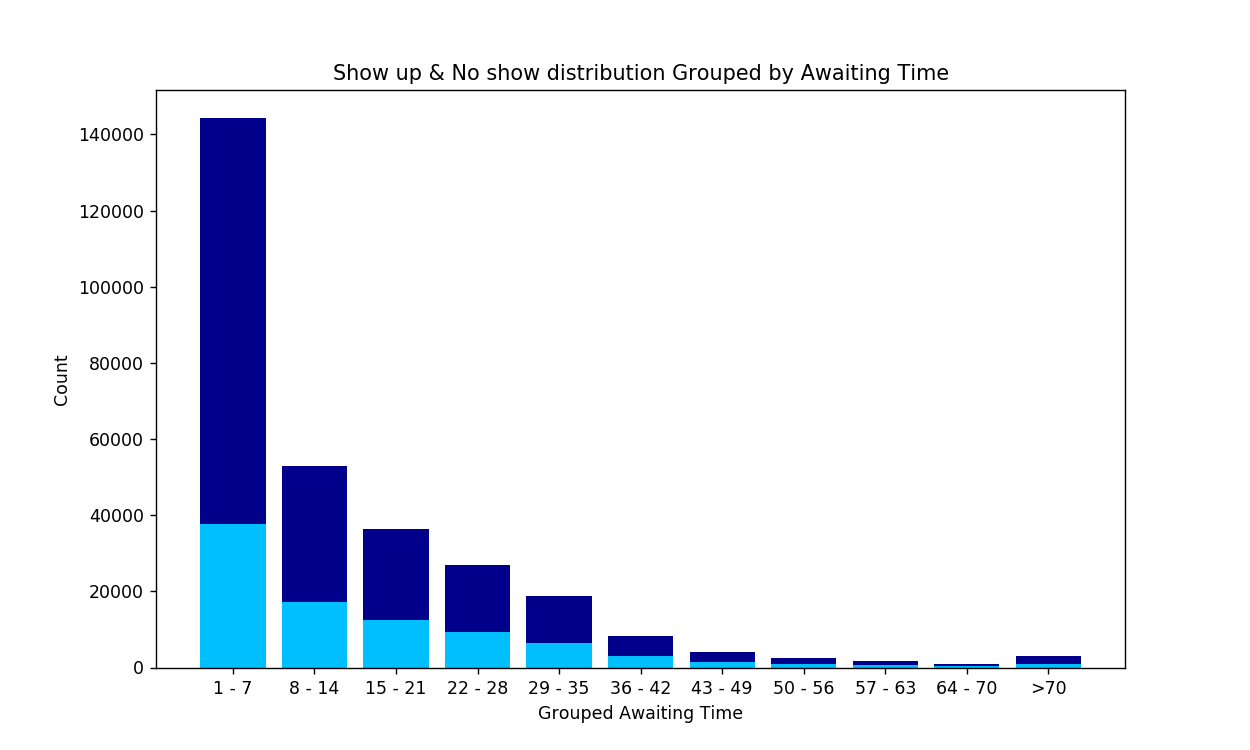

Text(0.5, 1.0, 'Show up & No show distribution Grouped by Awaiting Time')

In [18]:
# plot figure
fig6, ax61 = plt.subplots( figsize=(10, 6))
ax61.bar(AwaitingTimeDistribution.index,AwaitingTimeDistribution['No-Show'], color = 'deepskyblue')
ax61.bar(AwaitingTimeDistribution.index,AwaitingTimeDistribution['Show-Up'], bottom = AwaitingTimeDistribution['No-Show'],  color = 'darkblue')
plt.xlabel('Grouped Awaiting Time')
plt.ylabel('Count')
plt.title('Show up & No show distribution Grouped by Awaiting Time')

<IPython.core.display.Javascript object>


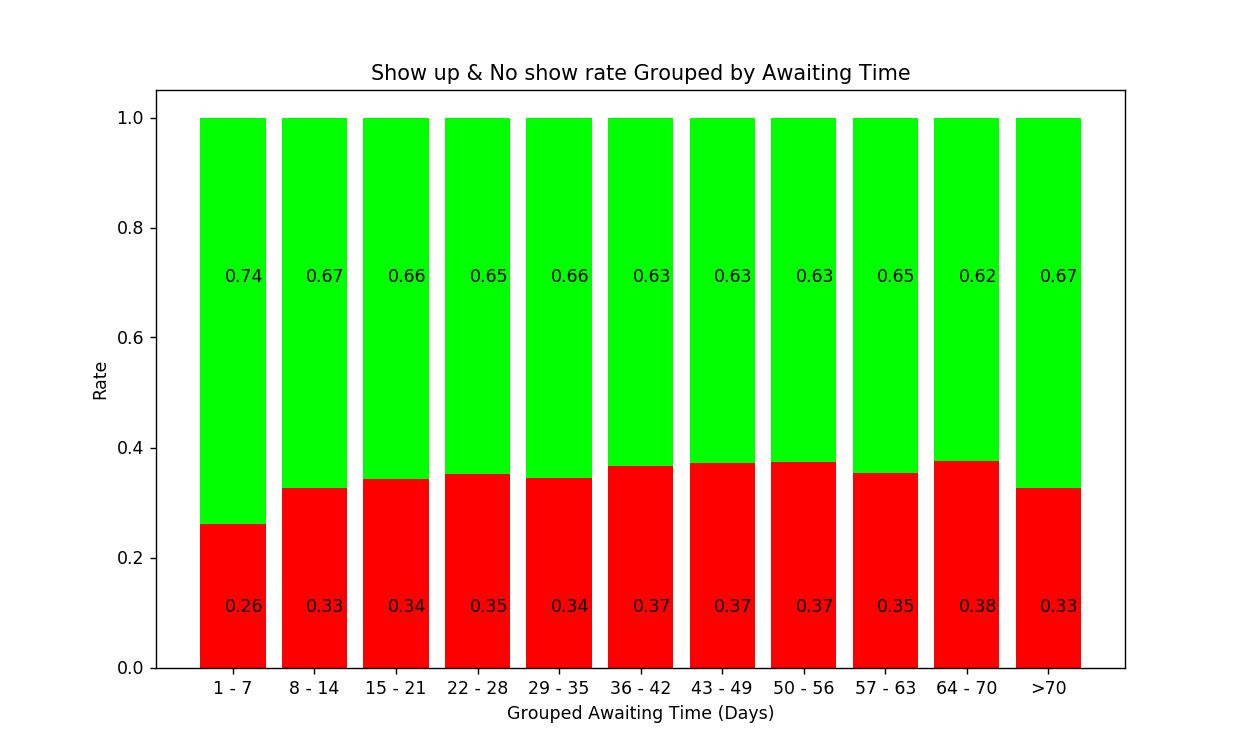

Text(0.5, 1.0, 'Show up & No show rate Grouped by Awaiting Time')

In [19]:
# plot figure
fig7, ax71 = plt.subplots(figsize=(10, 6))
ax71.bar(AwaitingTimeDistribution.index,AwaitingTimeDistribution['No-Show_rate'], color = 'red')
ax71.bar(AwaitingTimeDistribution.index,AwaitingTimeDistribution['Show-Up_rate'], bottom = AwaitingTimeDistribution['No-Show_rate'],  color = 'lime')
plt.xlabel('Grouped Awaiting Time (Days)')
plt.ylabel('Rate')
for i, v in enumerate(AwaitingTimeDistribution['No-Show_rate']):
    ax71.text(i -.1, 0.1 , str(round(v,2)), color='black' )
for i, v in enumerate(AwaitingTimeDistribution['Show-Up_rate']):
    ax71.text(i -.1, 0.7 , str(round(v,2)), color='black' )
plt.title('Show up & No show rate Grouped by Awaiting Time')

In [20]:
# Data for first 7 days and other than 7 days
first_7_days = pd.crosstab(data.AwaitingTime, data.Status)[:7]
after_7_days = pd.crosstab(data.AwaitingTime, data.Status)[8:].sum()
first_7_days.loc['others'] = [after_7_days[0], after_7_days[1]]
first_7_days['Total'] = first_7_days['No-Show'] + first_7_days['Show-Up']
first_7_days['No-Show_rate'] = first_7_days['No-Show'] / first_7_days['Total']
first_7_days['Show-Up_rate'] = first_7_days['Show-Up'] / first_7_days['Total']
first_7_days

Status,No-Show,Show-Up,Total,No-Show_rate,Show-Up_rate
AwaitingTime,,,,,
1,7012,23813,30825,0.227478,0.772522
2,7313,20751,28064,0.260583,0.739417
3,3664,10391,14055,0.260690,0.739310
4,5564,16990,22554,0.246697,0.753303
5,3488,9773,13261,0.263027,0.736973
6,4230,10449,14679,0.288167,0.711833
7,6377,14630,21007,0.303565,0.696435
others,49712,94793,144505,0.344016,0.655984


<IPython.core.display.Javascript object>


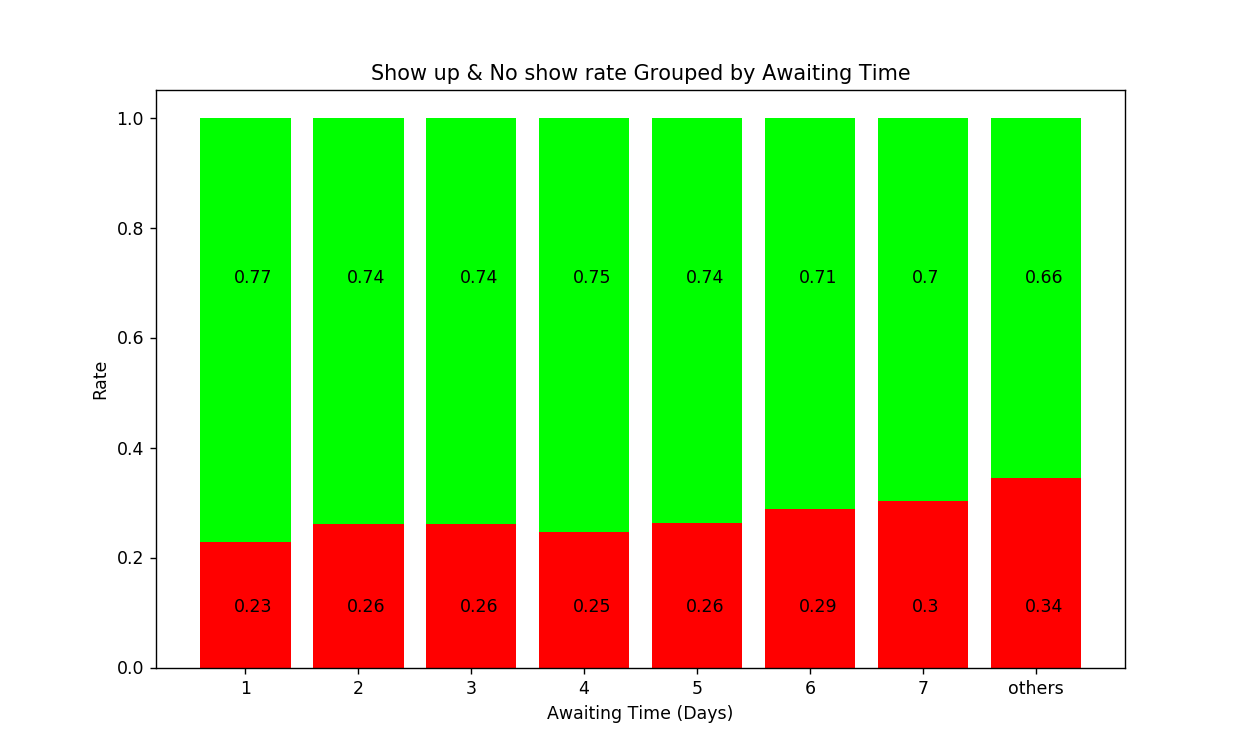

Text(0.5, 1.0, 'Show up & No show rate Grouped by Awaiting Time')

In [21]:
# plot figure
fig8, ax81 = plt.subplots(figsize=(10, 6))
ax81.bar(first_7_days.index.astype(np.string_), first_7_days['No-Show_rate'], color = 'red')
ax81.bar(first_7_days.index.astype(np.string_), first_7_days['Show-Up_rate'], bottom = first_7_days['No-Show_rate'],  color = 'lime')
plt.xlabel('Awaiting Time (Days)')
plt.ylabel('Rate')
for i, v in enumerate(first_7_days['No-Show_rate']):
    ax81.text(i -.1, 0.1 , str(round(v,2)), color='black' )
for i, v in enumerate(first_7_days['Show-Up_rate']):
    ax81.text(i -.1, 0.7 , str(round(v,2)), color='black' )
plt.title('Show up & No show rate Grouped by Awaiting Time')

In [22]:
# Data about in days
days_pivotab = pd.crosstab(data.DayOfTheWeek, data.Status)
days_pivotab['Total'] = days_pivotab['No-Show'] + days_pivotab['Show-Up']
days_pivotab['No-Show_rate'] = days_pivotab['No-Show'] / days_pivotab['Total']
days_pivotab['Show-Up_rate'] = days_pivotab['Show-Up'] / days_pivotab['Total']
days_pivotab_sorted = days_pivotab.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
days_pivotab_sorted

Status,No-Show,Show-Up,Total,No-Show_rate,Show-Up_rate
DayOfTheWeek,,,,,
Monday,19052,40242,59294,0.321314,0.678686
Tuesday,18144,44621,62765,0.289078,0.710922
Wednesday,18916,44573,63489,0.297941,0.702059
Thursday,17850,42406,60256,0.296236,0.703764
Friday,16243,36521,52764,0.307842,0.692158
Saturday,513,880,1393,0.368270,0.631730
Sunday,1,5,6,0.166667,0.833333


<IPython.core.display.Javascript object>


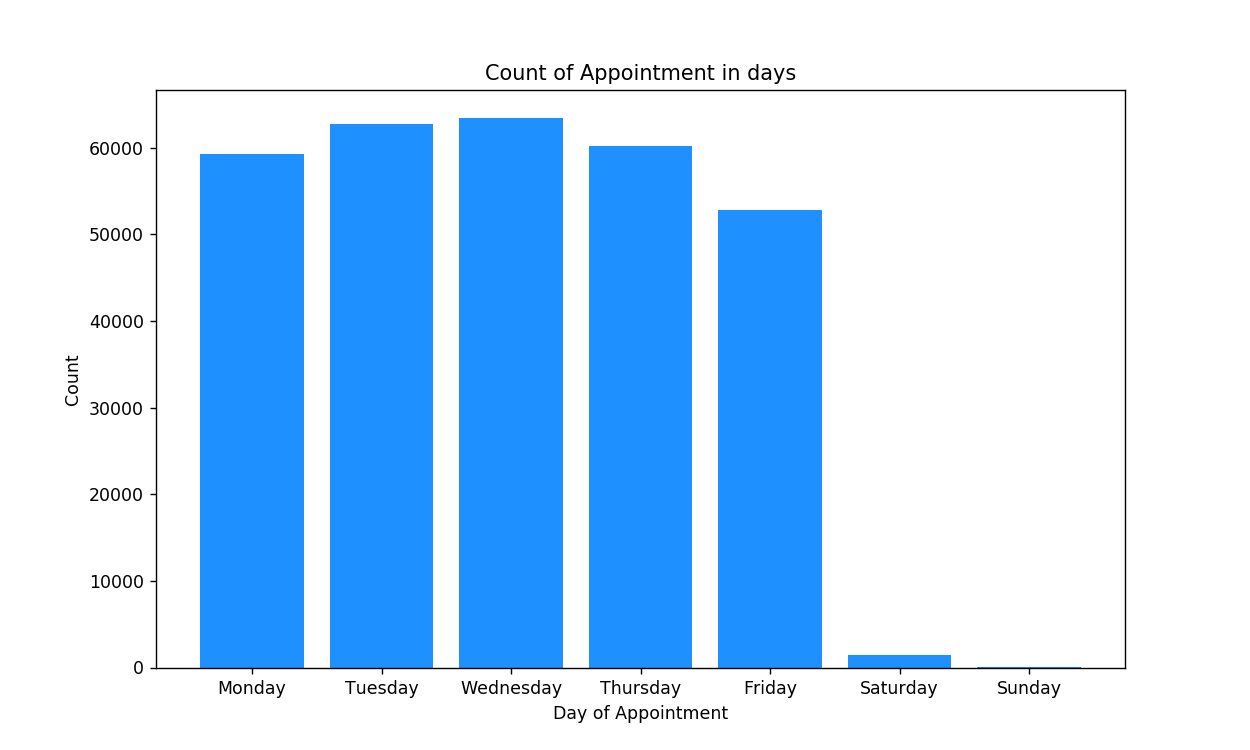

Text(0.5, 1.0, 'Count of Appointment in days')

In [23]:
# Plot figure
fig9, ax91 = plt.subplots( figsize=(10, 6))
ax91.bar(days_pivotab_sorted.index,days_pivotab_sorted['Total'], color = 'dodgerblue')
plt.xlabel('Day of Appointment')
plt.ylabel('Count')
plt.title('Count of Appointment in days')

<IPython.core.display.Javascript object>


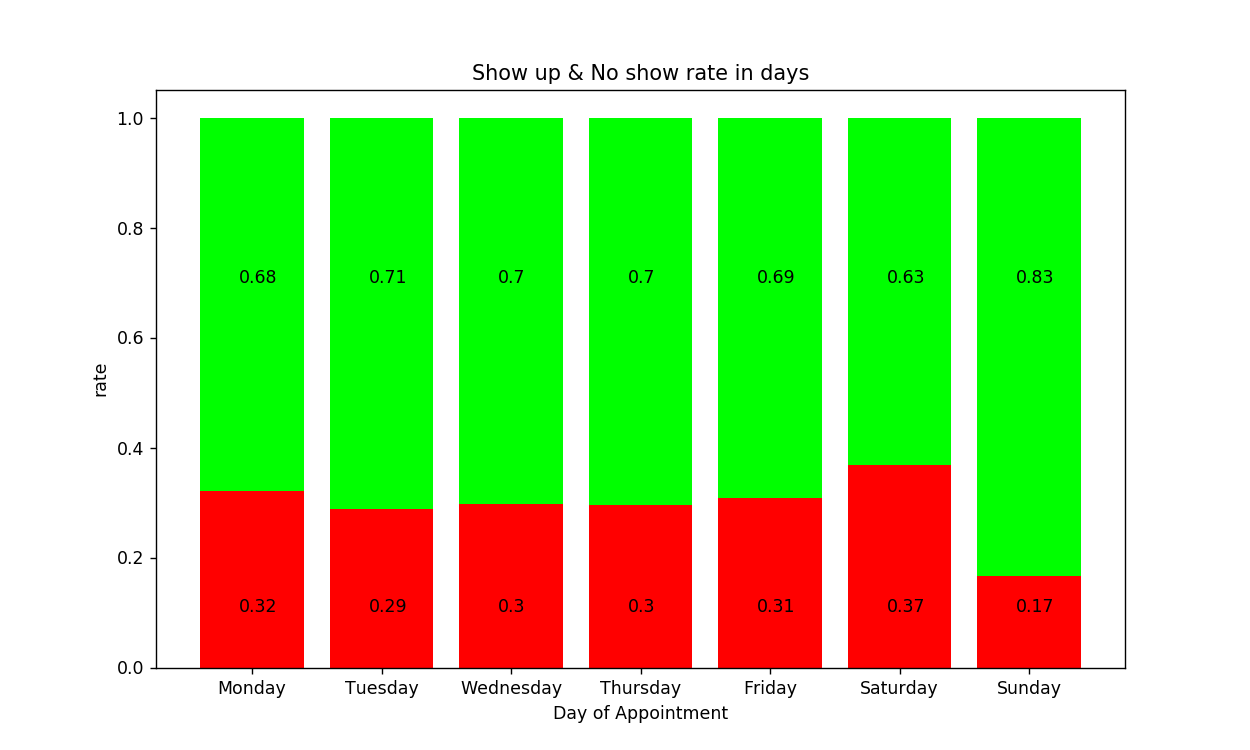

Text(0.5, 1.0, 'Show up & No show rate in days')

In [24]:
# Plot figure
fig10, ax101 = plt.subplots(figsize=(10, 6) )
ax101.bar(days_pivotab_sorted.index, days_pivotab_sorted['No-Show_rate'], color = 'red')
ax101.bar(days_pivotab_sorted.index, days_pivotab_sorted['Show-Up_rate'], bottom = days_pivotab_sorted['No-Show_rate'],  color = 'lime')
plt.xlabel('Day of Appointment')
plt.ylabel('rate')
for i, v in enumerate(days_pivotab_sorted['No-Show_rate']):
    ax101.text(i -.1, 0.1 , str(round(v,2)), color='black' )
for i, v in enumerate(days_pivotab_sorted['Show-Up_rate']):
    ax101.text(i -.1, 0.7 , str(round(v,2)), color='black' )
plt.title('Show up & No show rate in days')

In [25]:
# Data about in disease
data_disease = data[['Status', 'Diabetes', 'Hipertension', 'Handicap']]
data_disease

,Status,Diabetes,Hipertension,Handicap
0,Show-Up,0,0,0
1,Show-Up,0,0,0
2,Show-Up,0,0,0
3,Show-Up,0,0,0
4,Show-Up,0,0,0
...,...,...,...,...
299995,Show-Up,0,1,0
299996,Show-Up,1,1,0
299997,No-Show,0,0,0
299998,Show-Up,0,0,0


<IPython.core.display.Javascript object>


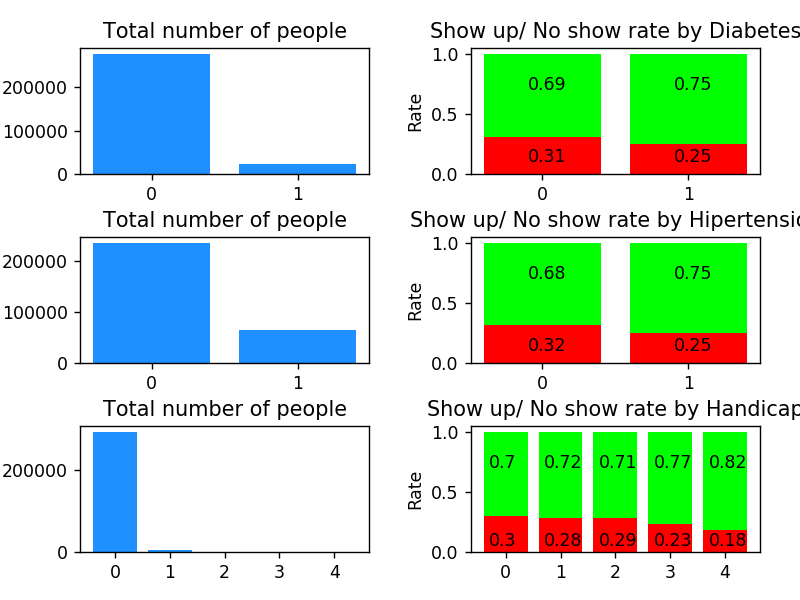

In [26]:
# Figure fo disease
Figure, axes = plt.subplots(3,2)
Figure.figsize=(10, 6)
for i in [0,1,2]:
    x = {0: 'Diabetes', 1: 'Hipertension', 2: 'Handicap' }
    name  = x[i]
    data_saved = pd.crosstab(data_disease.Status, data_disease[name])
    data_saved['show_subtotal'] = data_saved[0] + data_saved[1]
    data_saved.loc['saved_subtotal'] = data_saved.sum()
    data_saved.loc['No-Show_rate'] = data_saved.loc['No-Show'] / data_saved.loc['saved_subtotal']
    data_saved.loc['Show-Up_rate'] = data_saved.loc['Show-Up'] / data_saved.loc['saved_subtotal']
    if i == 2:
        axes[i,0].bar(['0','1','2','3','4'],data_saved.loc['saved_subtotal', [0,1,2,3,4]], color = ['dodgerblue'])
        axes[i,1].bar(['0','1','2','3','4'],data_saved.loc['No-Show_rate', [0,1,2,3,4]], color = 'red')
        axes[i,1].bar(['0','1','2','3','4'],data_saved.loc['Show-Up_rate', [0,1,2,3,4]], bottom=data_saved.loc['No-Show_rate', [0,1,2,3,4]], color = 'lime')
        for j, v in enumerate(data_saved.loc['No-Show_rate', [0,1,2,3,4]]):
            axes[i,1].text(j -.3, 0.05 , str(round(v,2)), color='black' )
        for j, v in enumerate(data_saved.loc['Show-Up_rate', [0,1,2,3,4]]):
            axes[i,1].text(j -.3, 0.7 , str(round(v,2)), color='black' )
    else:
        axes[i,0].bar(['0','1'],data_saved.loc['saved_subtotal', [0,1]], color = ['dodgerblue'])
        axes[i,1].bar(['0','1'],data_saved.loc['No-Show_rate', [0,1]], color = 'red')
        axes[i,1].bar(['0','1'],data_saved.loc['Show-Up_rate', [0,1]], bottom=data_saved.loc['No-Show_rate', [0,1]], color = 'lime')
        for j, v in enumerate(data_saved.loc['No-Show_rate', [0,1]]):
            axes[i,1].text(j -.1, 0.1 , str(round(v,2)), color='black' )
        for j, v in enumerate(data_saved.loc['Show-Up_rate', [0,1]]):
            axes[i,1].text(j -.1, 0.7 , str(round(v,2)), color='black' )
    axes[i,0].set_title('Total number of people')
    axes[i,1].set_title('Show up/ No show rate by '+ name)
    axes[i,1].set_ylabel('Rate')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)

<IPython.core.display.Javascript object>


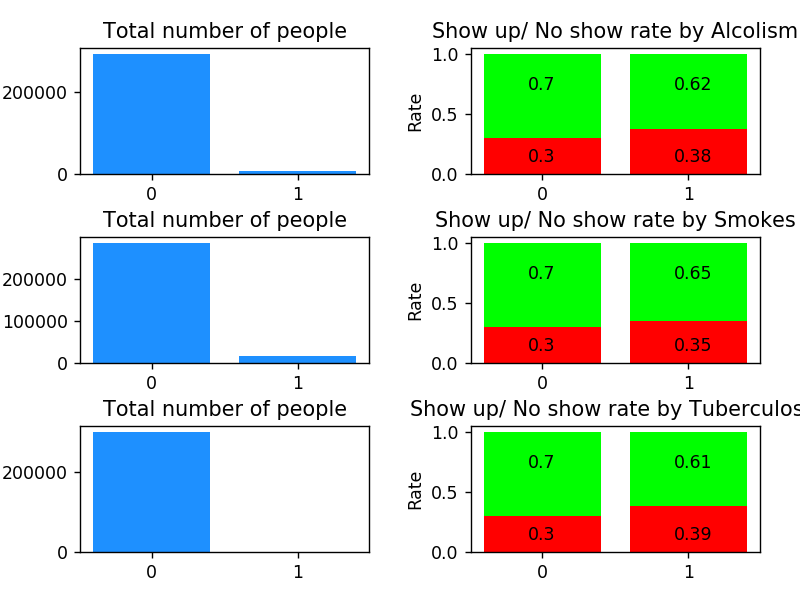

In [27]:
# Data about in disease2
data_disease2 = data[['Status', 'Alcolism', 'Smokes', 'Tuberculosis']]
data_disease2
# Figure for disease2
Figure2, axes2 = plt.subplots(3,2)
Figure2.figsize=(10, 6)
for i in [0,1,2]:
    x = {0: 'Alcolism', 1: 'Smokes', 2: 'Tuberculosis' }
    name  = x[i]
    data_saved = pd.crosstab(data_disease2.Status, data_disease2[name])
    data_saved['show_subtotal'] = data_saved[0] + data_saved[1]
    data_saved.loc['saved_subtotal'] = data_saved.sum()
    data_saved.loc['No-Show_rate'] = data_saved.loc['No-Show'] / data_saved.loc['saved_subtotal']
    data_saved.loc['Show-Up_rate'] = data_saved.loc['Show-Up'] / data_saved.loc['saved_subtotal']
    axes2[i,0].bar(['0','1'],data_saved.loc['saved_subtotal', [0,1]], color = ['dodgerblue'])
    axes2[i,1].bar(['0','1'],data_saved.loc['No-Show_rate', [0,1]], color = 'red')
    axes2[i,1].bar(['0','1'],data_saved.loc['Show-Up_rate', [0,1]], bottom=data_saved.loc['No-Show_rate', [0,1]], color = 'lime')
    axes2[i,0].set_title('Total number of people')
    axes2[i,1].set_title('Show up/ No show rate by '+ name)
    axes2[i,1].set_ylabel('Rate')
    for j, v in enumerate(data_saved.loc['No-Show_rate', [0,1]]):
        axes2[i,1].text(j -.1, 0.1 , str(round(v,2)), color='black' )
    for j, v in enumerate(data_saved.loc['Show-Up_rate', [0,1]]):
        axes2[i,1].text(j -.1, 0.7 , str(round(v,2)), color='black' )
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)

<IPython.core.display.Javascript object>


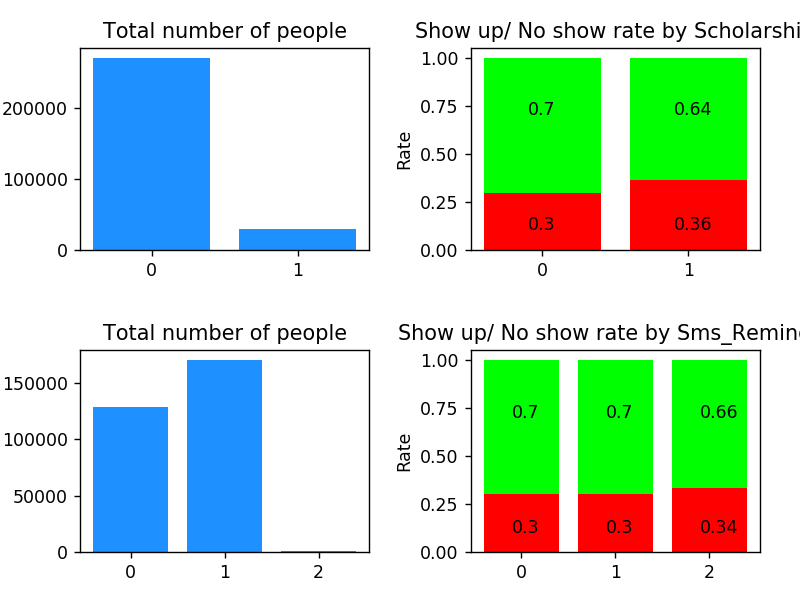

In [28]:
# Data about in Others
data_others = data[['Status', 'Scholarship', 'Sms_Reminder']]
data_others
# Figure for disease2
Figure3, axes3 = plt.subplots(2,2)
Figure3.figsize=(10, 6)
for i in [0,1]:
    x = {0: 'Scholarship', 1: 'Sms_Reminder' }
    name  = x[i]
    data_saved = pd.crosstab(data_others.Status, data_others[name])
    data_saved['show_subtotal'] = data_saved[0] + data_saved[1]
    data_saved.loc['saved_subtotal'] = data_saved.sum()
    data_saved.loc['No-Show_rate'] = data_saved.loc['No-Show'] / data_saved.loc['saved_subtotal']
    data_saved.loc['Show-Up_rate'] = data_saved.loc['Show-Up'] / data_saved.loc['saved_subtotal']
    if i == 1:
        axes3[i,0].bar(['0','1','2'],data_saved.loc['saved_subtotal', [0,1,2]], color = ['dodgerblue'])
        axes3[i,1].bar(['0','1','2'],data_saved.loc['No-Show_rate', [0,1,2]], color = 'red')
        axes3[i,1].bar(['0','1','2'],data_saved.loc['Show-Up_rate', [0,1,2]], bottom=data_saved.loc['No-Show_rate', [0,1,2]], color = 'lime')
        axes3[i,0].set_title('Total number of people')
        for j, v in enumerate(data_saved.loc['No-Show_rate', [0,1,2]]):
            axes3[i,1].text(j -.1, 0.1 , str(round(v,2)), color='black' )
        for j, v in enumerate(data_saved.loc['Show-Up_rate', [0,1,2]]):
            axes3[i,1].text(j -.1, 0.7 , str(round(v,2)), color='black' )
    else:
        axes3[i,0].bar(['0','1'],data_saved.loc['saved_subtotal', [0,1]], color = ['dodgerblue'])
        axes3[i,1].bar(['0','1'],data_saved.loc['No-Show_rate', [0,1]], color = 'red')
        axes3[i,1].bar(['0','1'],data_saved.loc['Show-Up_rate', [0,1]], bottom=data_saved.loc['No-Show_rate', [0,1]], color = 'lime')
        axes3[i,0].set_title('Total number of people')
        for j, v in enumerate(data_saved.loc['No-Show_rate', [0,1]]):
            axes3[i,1].text(j -.1, 0.1 , str(round(v,2)), color='black' )
        for j, v in enumerate(data_saved.loc['Show-Up_rate', [0,1]]):
            axes3[i,1].text(j -.1, 0.7 , str(round(v,2)), color='black' )
    axes3[i,1].set_title('Show up/ No show rate by '+ name)
    axes3[i,1].set_ylabel('Rate')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)